In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# train path
train_path = './datasets/chest_xray/train/'
# test path
test_path = './datasets/chest_xray/test/'

In [3]:
# ImageDataGenerator for creating train and test dataset
train_datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
)

test_datagen = ImageDataGenerator(rescale=1/255.0)

In [6]:
# creating the dataset
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
)

# creating the dataset
test_dataset = train_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [19]:
# model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(
    train_dataset,
    steps_per_epoch=(len(train_dataset)),
    epochs=10,
    validation_data=(test_dataset),
    validation_steps=(len(test_dataset))
)

Epoch 1/10
163/163 [==============================] - 82s 438ms/step - loss: 0.5052 - accuracy: 0.7433 - val_loss: 0.5323 - val_accuracy: 0.6923
Epoch 2/10
163/163 [==============================] - 65s 397ms/step - loss: 0.3591 - accuracy: 0.8347 - val_loss: 0.8489 - val_accuracy: 0.6827
Epoch 3/10
163/163 [==============================] - 66s 406ms/step - loss: 0.2986 - accuracy: 0.8671 - val_loss: 0.4560 - val_accuracy: 0.8093
Epoch 4/10
163/163 [==============================] - 64s 394ms/step - loss: 0.2889 - accuracy: 0.8790 - val_loss: 0.4120 - val_accuracy: 0.8381
Epoch 5/10
163/163 [==============================] - 64s 389ms/step - loss: 0.2613 - accuracy: 0.8896 - val_loss: 0.6148 - val_accuracy: 0.7436
Epoch 6/10
163/163 [==============================] - 63s 388ms/step - loss: 0.2526 - accuracy: 0.8972 - val_loss: 0.4248 - val_accuracy: 0.8237
Epoch 7/10
163/163 [==============================] - 62s 382ms/step - loss: 0.2647 - accuracy: 0.8867 - val_loss: 0.6985 - val_ac

In [37]:
loss, accuracy = model.evaluate(test_dataset)
print(f'model accuracy : {accuracy*100:.2f}%')
print(f'model loss : {loss*100:.2f}%')

20/20 [==============================] - 9s 429ms/step - loss: 0.4564 - accuracy: 0.8221
model accuracy : 82.21%
model loss : 45.64%


In [28]:
def load_image_process(image_path):
    image = load_img(image_path, target_size=(150,150))
    image_arr = img_to_array(image)
    image_arr = image_arr / 255.0
    image_arr = image_arr.reshape(1, 150, 150, 3)
    return image_arr

def process_display(image_path):
    processs_image = load_image_process(image_path)
    prediction = model.predict(processs_image)

    label = 'Penumonia' if prediction[0] > 0.5 else 'Normal'
    
    plt.title(f'prediction : {label}')
    plt.imshow(load_img(image_path, target_size=(150,150)))
    plt.show()
    

1/1 [==============================] - 0s 26ms/step


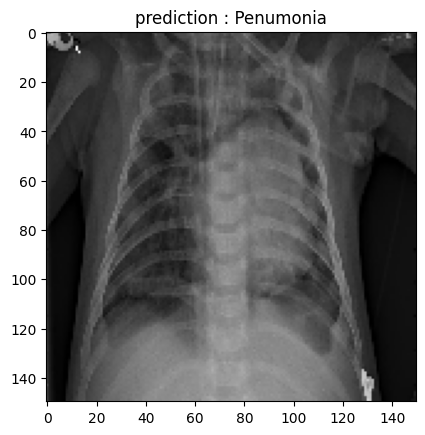

In [36]:
image='./datasets/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg'
process_display(image)